<Figure size 1000x800 with 0 Axes>

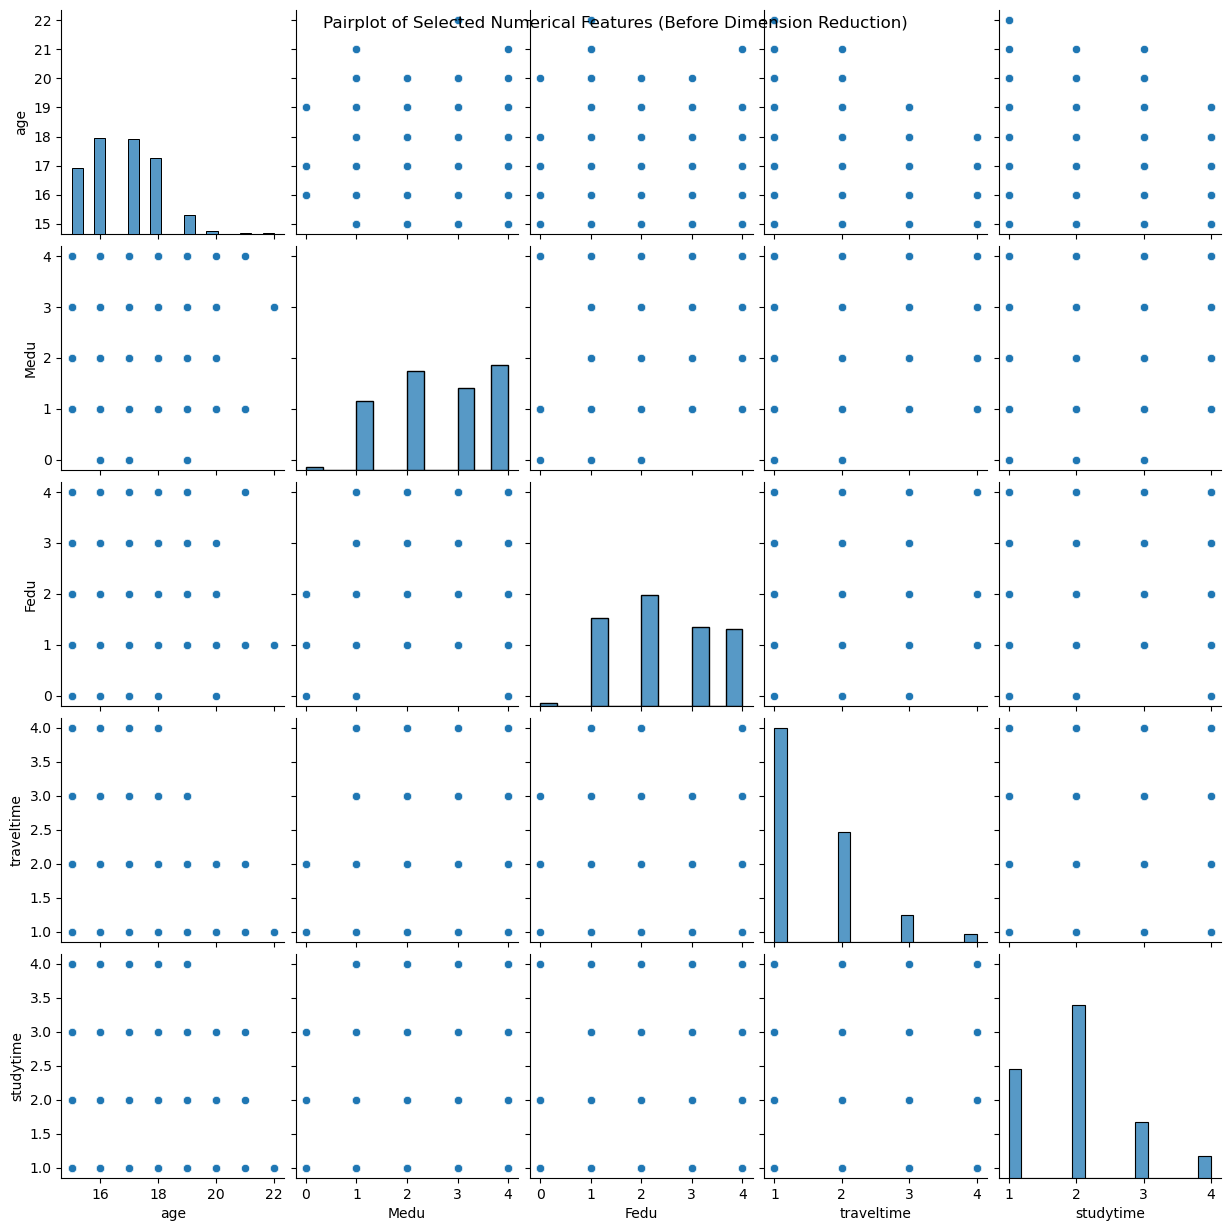


📋 EXPLAINED VARIANCE RATIO BY COMPONENT:
[0.21809957 0.12359213 0.0956193  0.08112514 0.070782  ]

📋 DATASET AFTER DIMENSION REDUCTION (First 5 rows of PCA components):
        PC1       PC2       PC3       PC4       PC5
0 -1.656156 -0.300391  2.534956 -0.188933  0.787587
1 -2.415487 -2.316375  0.571902  0.925266  0.489598
2 -2.874750 -1.162872 -0.261007 -0.679323  0.329347
3  2.743710 -0.995303  0.686515 -0.533992 -0.928722
4 -0.367464 -0.744112  1.843080  0.305950 -0.660117


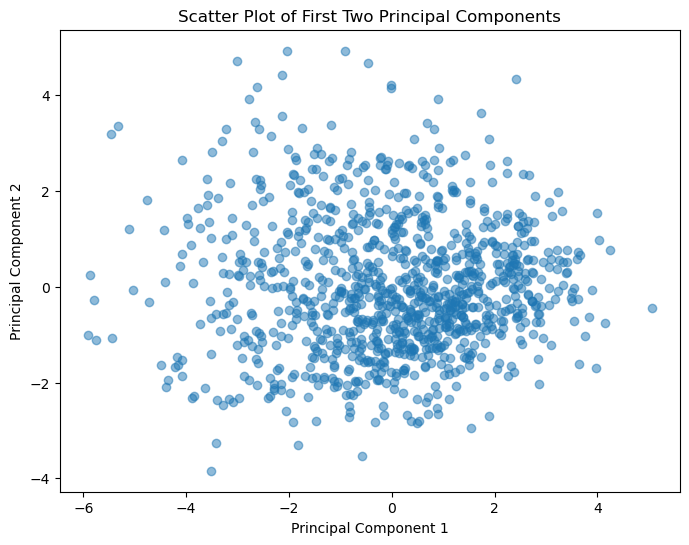

In [1]:
# Member 6: IT24103642 DE SILVA
# Preprocessing Technique: Dimension Reduction (Principal Component Analysis - PCA)
# Explanation: Dimension reduction reduces the number of features while retaining most of the data's variance using techniques 
# like Principal Component Analysis (PCA). PCA transforms the original features into a new set of uncorrelated principal components.
# Justification: The dataset has 34 columns, including correlated features (e.g., 'G1', 'G2', 'G3'), leading to high dimensionality. 
# PCA reduces this to a smaller set of components, improving computational efficiency and model performance.

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
%matplotlib inline

# Load and combine datasets (Update paths to match your environment)
df_math = pd.read_csv(r'C:\\Users\\User\\Desktop\\2025-Y2-S1-MLB-B13G1-10AIMLProject\\student-mat.csv', sep=";")
df_por = pd.read_csv(r'C:\\Users\\User\\Desktop\\2025-Y2-S1-MLB-B13G1-10AIMLProject\\student-por.csv', sep=";")

df_math['subject'] = 'math'
df_por['subject'] = 'portuguese'

df = pd.concat([df_math, df_por], ignore_index=True)

# Encode categorical variables for PCA (numerical data required)
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Select numerical columns for PCA
numerical_columns = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 
                     'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

# 1. EDA Visualization Before Dimension Reduction (Pairplot of selected features)
plt.figure(figsize=(10, 8))
sns.pairplot(df[numerical_columns[:5]])  # Showing first few for clarity
plt.suptitle('Pairplot of Selected Numerical Features (Before Dimension Reduction)')
plt.show()

# Interpretation: The pairplot shows correlations and distributions (e.g., 'G1' vs 'G2'), indicating redundancy that PCA can address.

# 2. Prepare data for PCA (Standardize features as PCA is sensitive to scale)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numerical_columns])

# Apply PCA
pca = PCA(n_components=5)  # Reduce to 5 components for illustration (adjust based on explained variance)
X_pca = pca.fit_transform(X_scaled)

# Convert to DataFrame for easier handling
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(5)])

# 3. Show Implementation Output (Explained variance ratio and first 5 rows of PCA components)
print("\n📋 EXPLAINED VARIANCE RATIO BY COMPONENT:")
print(pca.explained_variance_ratio_)
print("\n📋 DATASET AFTER DIMENSION REDUCTION (First 5 rows of PCA components):")
print(pca_df.head())

# 4. EDA Visualization After Dimension Reduction (Scatter plot of first two PCs)
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.title('Scatter Plot of First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Interpretation: The scatter plot of PC1 vs PC2 shows reduced dimensionality while retaining variance. The explained variance 
# ratio indicates how much information is preserved (e.g., if sum > 0.9, 90% of variance is retained).
# Save the visualization (optional, for results/eda_visualizations/ folder)
plt.savefig('dimension_reduction_scatter.png')